# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

# Reading Data:

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [11]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [12]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

# Preprocessing of data:

## Preprocessing of 'categorical data':

### preprocessing of `project_subject_categories`:

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into _
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### preprocessing of `project_subject_subcategories`:

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### Preprocessing of `project_grade_category`:

In [15]:
#https://stackoverflow.com/questions/22623375/python-remove-all-decimals-from-a-float
from tqdm import tqdm

preprocessed_grade=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade= grade.replace("Grades", '')
    grade= grade.replace("-", 'to')
    preprocessed_grade.append(grade)
    
#adding preprocessed grade to dataframe:
project_data['clean_grade']=preprocessed_grade
project_data.drop('project_grade_category', axis=1, inplace= True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_grade'].values:
    my_counter.update(word.split())
    
clean_grade_dict = dict(my_counter)
sorted_clean_grade_dict = dict(sorted(clean_grade_dict.items(), key=lambda kv: kv[1]))

100%|██████████| 109248/109248 [00:00<00:00, 1059447.05it/s]


### Preprocessing of `teacher_prefix`:

In [16]:
#https://stackoverflow.com/questions/22623375/python-remove-all-decimals-from-a-float
from tqdm import tqdm

preprocessed_prefix=[]
for prefix in tqdm(project_data['teacher_prefix'].values):
    prefix= str(prefix).split('.')[0]
    preprocessed_prefix.append(prefix.lower().strip())
    
project_data['clean_prefix']= preprocessed_prefix
project_data.drop(['teacher_prefix'], axis= 1, inplace= True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_prefix'].values:
    my_counter.update(word.split())
    
clean_prefix_dict = dict(my_counter)
sorted_clean_prefix_dict = dict(sorted(clean_prefix_dict.items(), key=lambda kv: kv[1]))

100%|██████████| 109248/109248 [00:00<00:00, 1027600.34it/s]


### Preprocessing of `school_state`:

In [17]:
preprocessed_states=[]

for state in tqdm(project_data['school_state'].values):
    state=state.lower()
    preprocessed_states.append(state)
    
project_data['clean_state']= preprocessed_states
project_data.drop(['school_state'], axis=1, inplace= True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_state'].values:
    my_counter.update(word.split())
    
clean_state_dict = dict(my_counter)
sorted_clean_state_dict = dict(sorted(clean_state_dict.items(), key=lambda kv: kv[1]))

100%|██████████| 109248/109248 [00:00<00:00, 1784044.43it/s]


## Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [19]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [21]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [24]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [25]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Preprocessing of `essay`:

In [27]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:55<00:00, 1963.40it/s]


In [28]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

### Preprocessing of `project_title`:

In [29]:
# similarly we preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 42673.10it/s]


## 1.5 Preparing data for models

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'project_submitted_datetime',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_prefix', 'clean_state', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Splitting data into Train, Test and CV:


In [0]:
Y= project_data['project_is_approved'].values
X= project_data.drop(['project_is_approved'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, stratify=Y)
X_train, X_cv, Y_train, Y_cv= train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train )

In [33]:
print(Y_train.shape, X_train.shape, )
print(Y_test.shape, X_test.shape, )
print(Y_cv.shape, X_cv.shape, )

(53531,) (53531, 17)
(32775,) (32775, 17)
(22942,) (22942, 17)


### Preprocessing of Text Data:

#### essays:

In [34]:
# train data 
from tqdm import tqdm
X_train_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_essays.append(sent.lower().strip())

100%|██████████| 53531/53531 [00:27<00:00, 1957.82it/s]


In [35]:
# Test data 
from tqdm import tqdm
X_test_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_essays.append(sent.lower().strip())

100%|██████████| 32775/32775 [00:16<00:00, 1965.86it/s]


In [36]:
# CV 
from tqdm import tqdm
X_cv_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_cv_essays.append(sent.lower().strip())

100%|██████████| 22942/22942 [00:11<00:00, 1956.91it/s]


#### titles:

In [37]:
X_train.head(1)

Unnamed: 0  ...                                              essay
56185       98347  ...  Considering that many of our students are grow...

[1 rows x 17 columns]

In [38]:
# Combining all the above stundents 
from tqdm import tqdm
X_train_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_titles.append(sent.lower().strip())

100%|██████████| 53531/53531 [00:01<00:00, 42151.37it/s]


In [39]:
# Combining all the above stundents 
from tqdm import tqdm
X_test_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_titles.append(sent.lower().strip())

100%|██████████| 32775/32775 [00:00<00:00, 41396.27it/s]


In [40]:
# Combining all the above stundents 
from tqdm import tqdm
X_cv_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_cv_titles.append(sent.lower().strip())

100%|██████████| 22942/22942 [00:00<00:00, 41983.06it/s]


# Vectorization:

## Vectorizing Categorical data:

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### Vectorizing `clean_categories`:

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_c = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_c.fit(X_train['clean_categories'].values)

X_train_categories=vectorizer_c.transform(X_train['clean_categories'].values)
X_test_categories=vectorizer_c.transform(X_test['clean_categories'].values)
X_cv_categories=vectorizer_c.transform(X_cv['clean_categories'].values)

### Vectorizing `clean_subcategories`:

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_sc = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_sc.fit(X_train['clean_subcategories'].values)

X_train_subcategories=vectorizer_sc.transform(X_train['clean_subcategories'].values)
X_test_subcategories=vectorizer_sc.transform(X_test['clean_subcategories'].values)
X_cv_subcategories=vectorizer_sc.transform(X_cv['clean_subcategories'].values)

### Vectorizing `clean_prefix`:

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_p = CountVectorizer(vocabulary=list(sorted_clean_prefix_dict.keys()), lowercase=False, binary=True)

vectorizer_p.fit(X_train['clean_prefix'].values)

X_train_prefix=vectorizer_p.transform(X_train['clean_prefix'].values)
X_test_prefix=vectorizer_p.transform(X_test['clean_prefix'].values)
X_cv_prefix=vectorizer_p.transform(X_cv['clean_prefix'].values)

### Vectorizing `States`:

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_st = CountVectorizer(vocabulary=list(sorted_clean_state_dict.keys()), lowercase=False, binary=True)

vectorizer_st.fit(X_train['clean_state'].values)

X_train_states=vectorizer_st.transform(X_train['clean_state'].values)
X_test_states=vectorizer_st.transform(X_test['clean_state'].values)
X_cv_states=vectorizer_st.transform(X_cv['clean_state'].values)

### Vectorizing `Grades`:

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_g = CountVectorizer(vocabulary=list(sorted_clean_grade_dict.keys()), lowercase=False, binary=True)

vectorizer_g.fit(X_train['clean_grade'].values)

X_train_grades=vectorizer_g.transform(X_train['clean_grade'].values)
X_test_grades=vectorizer_g.transform(X_test['clean_grade'].values)
X_cv_grades=vectorizer_g.transform(X_cv['clean_grade'].values)

### Vectorizing Text data

#### TFIDF vectorizer

In [46]:
# ESSAYS:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# fitting and transforming on processed data only
vectorizer_tf_essay = TfidfVectorizer(min_df=10, ngram_range= (1,2), max_features= 5000)
X_train_tfidf_essay = vectorizer_tf_essay.fit(X_train_essays)

X_train_tfidf_essay = vectorizer_tf_essay.transform(X_train_essays)
X_test_tfidf_essay = vectorizer_tf_essay.transform(X_test_essays)
X_cv_tfidf_essay = vectorizer_tf_essay.transform(X_cv_essays)

print (X_train_tfidf_essay.shape)
print (X_test_tfidf_essay.shape)
print (X_cv_tfidf_essay.shape)

(53531, 5000)
(32775, 5000)
(22942, 5000)


In [47]:
# titleS:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# fitting and transforming on processed data only
vectorizer_tf_title = TfidfVectorizer(min_df=10, ngram_range= (1,2), max_features= 5000)
X_train_tfidf_title = vectorizer_tf_title.fit(X_train_titles)

X_train_tfidf_title = vectorizer_tf_title.transform(X_train_titles)
X_test_tfidf_title = vectorizer_tf_title.transform(X_test_titles)
X_cv_tfidf_title = vectorizer_tf_title.transform(X_cv_titles)

print (X_train_tfidf_title.shape)
print (X_test_tfidf_title.shape)
print (X_cv_tfidf_title.shape)

(53531, 4043)
(32775, 4043)
(22942, 4043)


#### Using Pretrained Models: TFIDF weighted W2V

In [48]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

0it [00:00, ?it/s]

Loading Glove Model


1917495it [03:49, 8345.98it/s]

Done. 1917495  words loaded!


In [0]:
glove_words= set(model.keys())

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [51]:
vectorizer_c.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary=['Warmth', 'Care_Hunger', 'History_Civics',
                            'Music_Arts', 'AppliedLearning', 'SpecialNeeds',
                            'Health_Sports', 'Math_Science',
                            'Literacy_Language'])>

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(preprocessed):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [53]:
X_train_tfidf_w2v_essay= tfidf_w2v(X_train_essays)

100%|██████████| 53531/53531 [01:47<00:00, 498.08it/s]

53531
300


In [54]:
X_test_tfidf_w2v_essay= tfidf_w2v(X_test_essays)

100%|██████████| 32775/32775 [01:05<00:00, 502.89it/s]

32775
300


In [55]:
X_cv_tfidf_w2v_essay= tfidf_w2v(X_cv_essays)

100%|██████████| 22942/22942 [00:45<00:00, 503.55it/s]

22942
300


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(preprocessed):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [58]:
X_train_tfidf_w2v_title= tfidf_w2v(X_train_titles)

100%|██████████| 53531/53531 [00:01<00:00, 31462.61it/s]

53531
300


In [59]:
X_test_tfidf_w2v_title= tfidf_w2v(X_test_titles)

100%|██████████| 32775/32775 [00:01<00:00, 30853.85it/s]

32775
300


In [60]:
X_cv_tfidf_w2v_title= tfidf_w2v(X_cv_titles)

100%|██████████| 22942/22942 [00:00<00:00, 29804.77it/s]

22942
300


In [0]:
#converting list to array
X_train_tfidf_w2v_essay= np.array(X_train_tfidf_w2v_essay)
X_test_tfidf_w2v_essay= np.array(X_test_tfidf_w2v_essay)
X_cv_tfidf_w2v_essay= np.array(X_cv_tfidf_w2v_essay)

X_train_tfidf_w2v_title= np.array(X_train_tfidf_w2v_title)
X_test_tfidf_w2v_title= np.array(X_test_tfidf_w2v_title)
X_cv_tfidf_w2v_title= np.array(X_cv_tfidf_w2v_title)

##  Vectorizing Numerical features

#### Price:

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [63]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(price_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
X_test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
X_cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

Mean : 297.9500774272917, Standard deviation : 368.7542771872802


#### Quantity:

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

quantity_scalar= StandardScaler()
quantity_scalar.fit(price_data['quantity'].values.reshape(-1,1))

X_train_quantity_standardized= quantity_scalar.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_standardized= quantity_scalar.transform(X_test['quantity'].values.reshape(-1,1))
X_cv_quantity_standardized= quantity_scalar.transform(X_cv['quantity'].values.reshape(-1,1))

#### Previous Projects:

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

previous_projects_scalar= StandardScaler()
previous_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_projects_standardized= previous_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_projects_standardized= previous_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_previous_projects_standardized= previous_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

##Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [66]:
print (X_train_categories.shape)
print (X_train_subcategories.shape)
print (X_train_prefix.shape)
print (X_train_states.shape)
print (X_train_grades.shape)
print (X_train_tfidf_essay.shape)
print (X_train_tfidf_title.shape)
print (X_train_tfidf_w2v_essay.shape)
print (X_train_tfidf_w2v_title.shape)
print (X_train_price_standardized.shape)
print (X_train_quantity_standardized.shape)
print (X_train_previous_projects_standardized.shape)

(53531, 9)
(53531, 30)
(53531, 6)
(53531, 51)
(53531, 4)
(53531, 5000)
(53531, 4043)
(53531, 300)
(53531, 300)
(53531, 1)
(53531, 1)
(53531, 1)


In [67]:
print (X_test_categories.shape)
print (X_test_subcategories.shape)
print (X_test_prefix.shape)
print (X_test_states.shape)
print (X_test_grades.shape)
print (X_test_tfidf_essay.shape)
print (X_test_tfidf_title.shape)
print (X_test_tfidf_w2v_essay.shape)
print (X_test_tfidf_w2v_title.shape)
print (X_test_price_standardized.shape)
print (X_test_quantity_standardized.shape)
print (X_test_previous_projects_standardized.shape)

(32775, 9)
(32775, 30)
(32775, 6)
(32775, 51)
(32775, 4)
(32775, 5000)
(32775, 4043)
(32775, 300)
(32775, 300)
(32775, 1)
(32775, 1)
(32775, 1)


In [68]:
print (X_cv_categories.shape)
print (X_cv_subcategories.shape)
print (X_cv_prefix.shape)
print (X_cv_states.shape)
print (X_cv_grades.shape)
print (X_cv_tfidf_essay.shape)
print (X_cv_tfidf_title.shape)
print (X_cv_tfidf_w2v_essay.shape)
print (X_cv_tfidf_w2v_title.shape)
print (X_cv_price_standardized.shape)
print (X_cv_quantity_standardized.shape)
print (X_cv_previous_projects_standardized.shape)

(22942, 9)
(22942, 30)
(22942, 6)
(22942, 51)
(22942, 4)
(22942, 5000)
(22942, 4043)
(22942, 300)
(22942, 300)
(22942, 1)
(22942, 1)
(22942, 1)


##### SET 1 (TFIDF):

In [69]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_train = hstack((  X_train_categories, X_train_subcategories ,X_train_prefix ,X_train_states
  ,X_train_grades ,X_train_tfidf_essay ,X_train_tfidf_title ,X_train_price_standardized ,X_train_quantity_standardized,X_train_previous_projects_standardized))
X_set1_train.shape

(53531, 9146)

In [70]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_test = hstack((  X_test_categories, X_test_subcategories ,X_test_prefix ,X_test_states
  ,X_test_grades ,X_test_tfidf_essay ,X_test_tfidf_title ,X_test_price_standardized ,X_test_quantity_standardized,X_test_previous_projects_standardized))
X_set1_test.shape

(32775, 9146)

In [71]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_cv = hstack((  X_cv_categories, X_cv_subcategories ,X_cv_prefix ,X_cv_states
  ,X_cv_grades ,X_cv_tfidf_essay ,X_cv_tfidf_title ,X_cv_price_standardized ,X_cv_quantity_standardized,X_cv_previous_projects_standardized))
X_set1_cv.shape

(22942, 9146)

#### SET 2 (TFIDF W2V):

In [72]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_train = hstack((  X_train_categories, X_train_subcategories ,X_train_prefix ,X_train_states
  ,X_train_grades ,X_train_tfidf_w2v_essay ,X_train_tfidf_w2v_title ,X_train_price_standardized ,X_train_quantity_standardized,X_train_previous_projects_standardized))
X_set2_train.shape

(53531, 703)

In [73]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_test = hstack((  X_test_categories, X_test_subcategories ,X_test_prefix ,X_test_states
  ,X_test_grades ,X_test_tfidf_w2v_essay ,X_test_tfidf_w2v_title ,X_test_price_standardized ,X_test_quantity_standardized,X_test_previous_projects_standardized))
X_set2_test.shape

(32775, 703)

In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_cv = hstack((  X_cv_categories, X_cv_subcategories ,X_cv_prefix ,X_cv_states
  ,X_cv_grades ,X_cv_tfidf_w2v_essay ,X_cv_tfidf_w2v_title ,X_cv_price_standardized ,X_cv_quantity_standardized,X_cv_previous_projects_standardized))
X_set2_cv.shape

(22942, 703)

# Assignment 7: Decision Trees

## TFIDF, (SET 1):

In [75]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dt= DecisionTreeClassifier(class_weight= 'balanced',min_samples_split=500)
param= {'max_depth':[1,5,10,50], 'min_samples_split':[5,10,100,500]}

clf= GridSearchCV(dt, param, scoring= 'roc_auc', cv=3, return_train_score= True, n_jobs=-1)
clf.fit(X_set1_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=500,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'

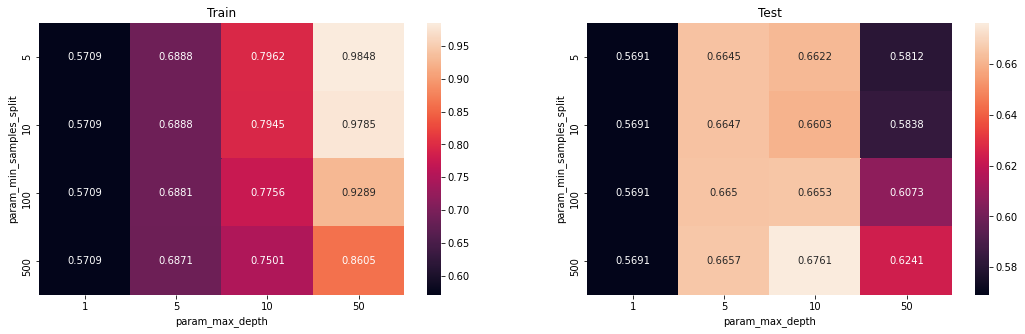

In [76]:
#confusion matrix
# cv_results_ is A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame
scores= pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
#grouping by param_min_samples and param_max_depth and corrresponding to them, max mean score obtained by gridsearch

fig, ax= plt.subplots(1,2, figsize=(18,5)) #18width,5 height of each plot
ax[0].set_title('Train') #title for first plot
ax[1].set_title('Test') #title for second plot

sns.heatmap(scores.mean_train_score,annot=True,fmt='.4g', ax=ax[0])
sns.heatmap(scores.mean_test_score,annot=True,fmt='.4g', ax=ax[1])

plt.show()

In [77]:
clf.best_params_ #best parameters as per gridsearch

{'max_depth': 10, 'min_samples_split': 500}

In [0]:
def pred_proba(clf, data): #function to predict y
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

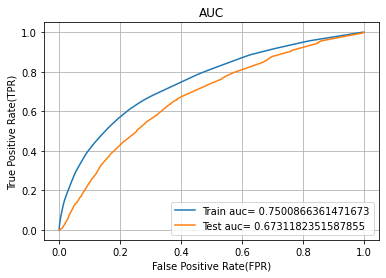

In [79]:
from sklearn.metrics import roc_curve, auc
dectree= DecisionTreeClassifier( class_weight= 'balanced', max_depth= clf.best_params_['max_depth'], min_samples_split= clf.best_params_['min_samples_split'] )
dectree.fit(X_set1_train, Y_train)

Y_train_pred= pred_proba(dectree,X_set1_train)
Y_test_pred= pred_proba(dectree, X_set1_test)

train_fpr, train_tpr, tr_thresholds= roc_curve(Y_train, Y_train_pred)
test_fpr, test_tpr, te_thresholds= roc_curve(Y_test, Y_test_pred)

plt.plot(train_fpr, train_tpr, label= "Train auc= "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label= "Test auc= "+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix:


#### Train:


In [0]:
#finding best threshold which gives minimum fpr:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#predicting with best thresholds:
def predict_with_best_t(proba, threshold):
    predictions = []
    global predictions_bow
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_bow=predictions
    return predictions

In [81]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(Y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4744123551416323 for threshold 0.48
Train confusion matrix
[[ 5848  2257]
 [15558 29868]]


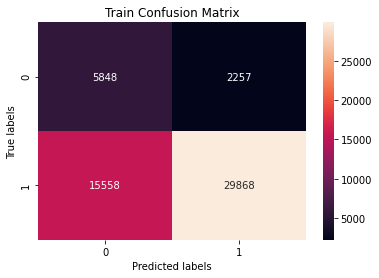

In [82]:
#heatmap
ax=plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict_with_best_t(Y_train_pred, best_t)),ax=ax, annot=True,fmt='g');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

#### Test:

In [83]:
best_t = find_best_threshold(tr_thresholds, test_fpr, test_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(Y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4060507412554615 for threshold 0.457
Train confusion matrix
[[ 3087  1876]
 [ 9656 18156]]


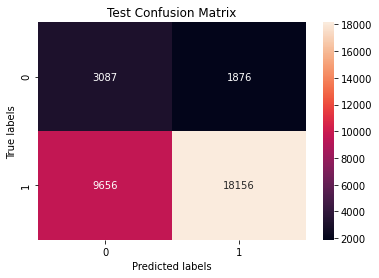

In [84]:
#heatmap
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict_with_best_t(Y_test_pred, best_t)),annot=True,ax=ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

Aggregating Features:


In [0]:
fn1=vectorizer_c.get_feature_names()
fn2=vectorizer_sc.get_feature_names()
fn3=vectorizer_p.get_feature_names()
fn4=vectorizer_g.get_feature_names()
fn5=vectorizer_st.get_feature_names()
fn6=vectorizer_tf_essay.get_feature_names()
fn7=vectorizer_tf_title.get_feature_names()

features_tfidf= fn1+fn2+fn3+fn4+fn5+fn6+fn7

features_tfidf.append('teacher_previous_projects')
features_tfidf.append('price')
features_tfidf.append('quantity')

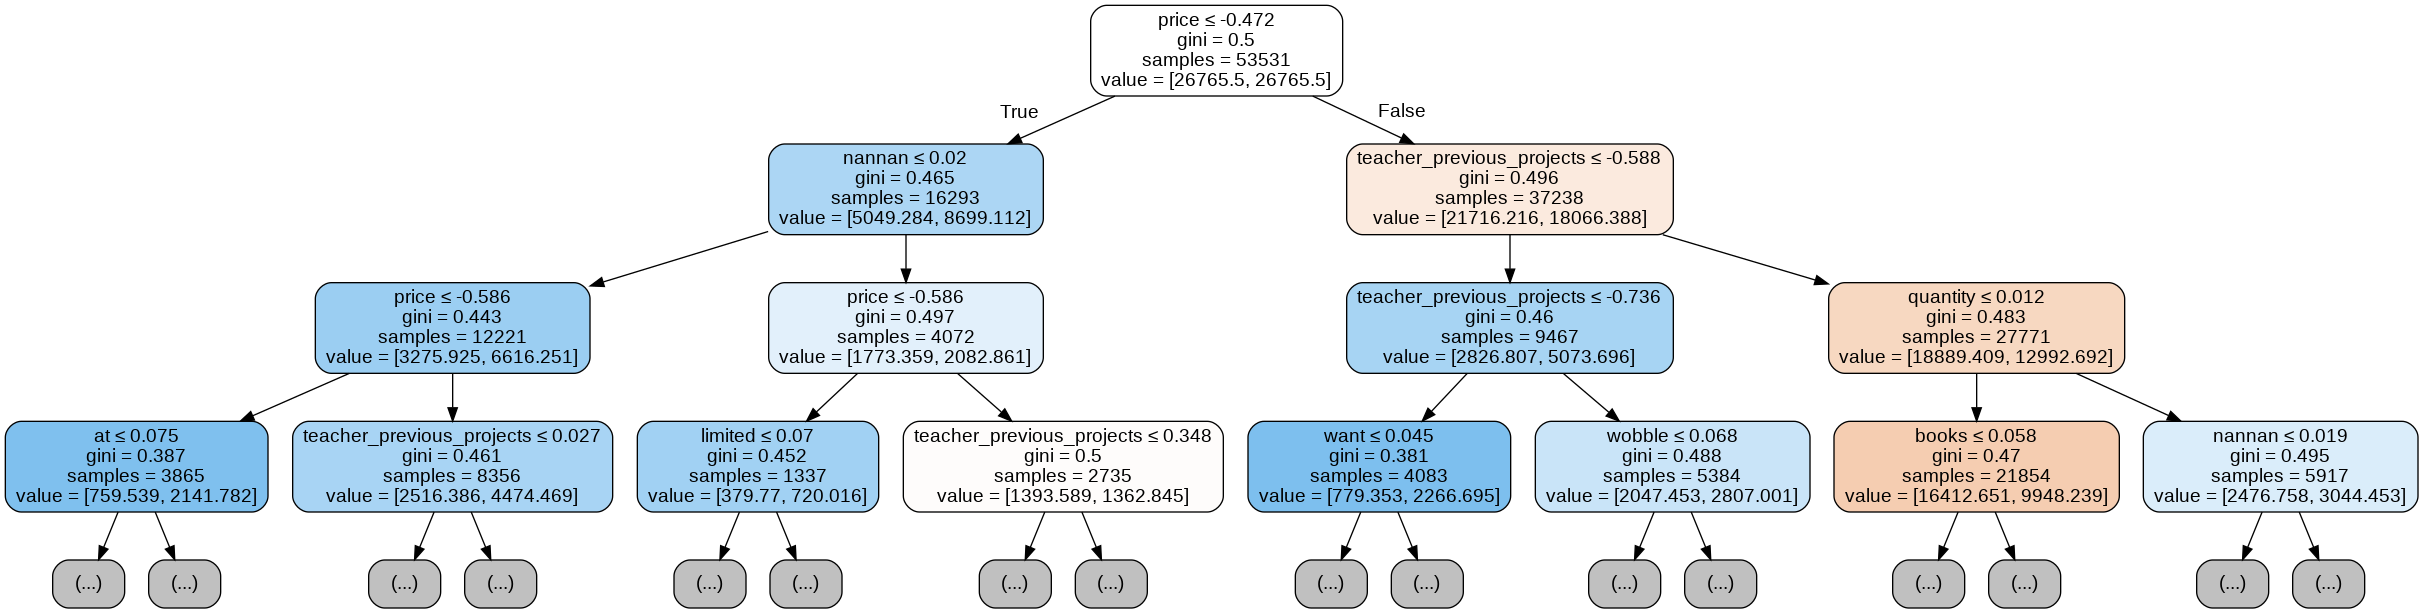

In [87]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

dt.fit(X_set1_train, Y_train)

dot_data=StringIO() #reads and writes a strings as files (also known as memory files)
# graphviz function generates a GraphViz representation of the decision tree, which is then written into out_file (DOT format)
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features_tfidf, max_depth=3)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) #takes graph and gives output as png image file

Getting the false positives:

In [0]:
# finding the index of all the false positives that is 'actual negatives', wrongly classified as 'positives':
fp= []

for i in range(len(Y_test)):
  if (Y_test[i]==0) & (predictions_bow[i]==1):
    fp.append(i)

In [0]:
# for all those data points which are 'false positive' we extract their essay for word cloud:
fp_essay=[]
for i in fp:
  fp_essay.append(X_test['essay'].values[1])

Word Cloud

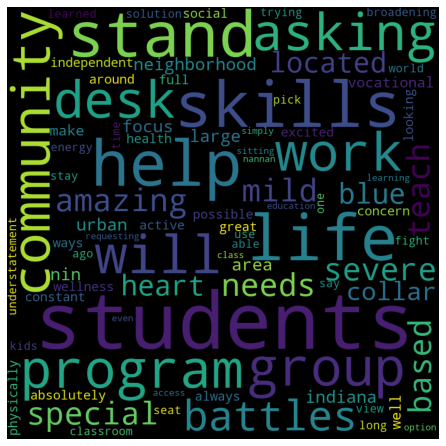

In [90]:
# https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
  val = str(val) # converts all type of values into string
  tokens = val.split() # splits the sentences into individual words
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower() #lowercases the words
  
for words in tokens : #seperates the words by a blank space
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [0]:
cols = X_test.columns
X_test_false_bow = pd.DataFrame(columns=cols)

In [0]:
for i in fp :
  X_test_false_bow = X_test_false_bow.append(X_test.filter(items=[i], axis=0)) #filtering by index of false positives

In [93]:
len(fp)

1876

In [94]:
X_test_false_bow.shape

(1876, 19)

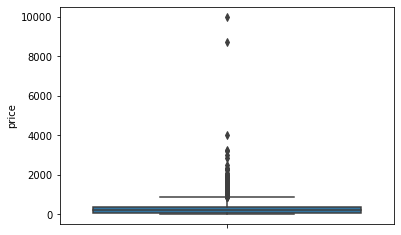

In [95]:
ax = sns.boxplot(y='price', data=X_test_false_bow)

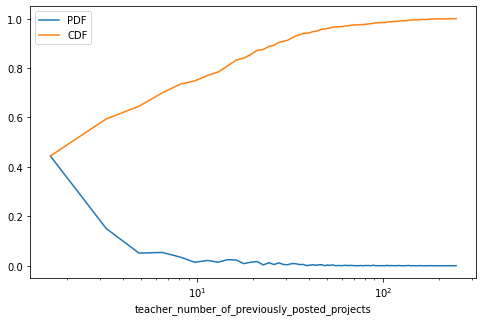

In [96]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_false_bow['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

## TFIDF W2V (SET 2):

In [97]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dt= DecisionTreeClassifier(class_weight= 'balanced',max_depth=4,min_samples_split=500)
param= {'max_depth':[1,5,10,50], 'min_samples_split':[5,10,100,500]}

clf= GridSearchCV(dt, param, scoring= 'roc_auc', cv=3, return_train_score= True, n_jobs=-1)
clf.fit(X_set2_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=500,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max

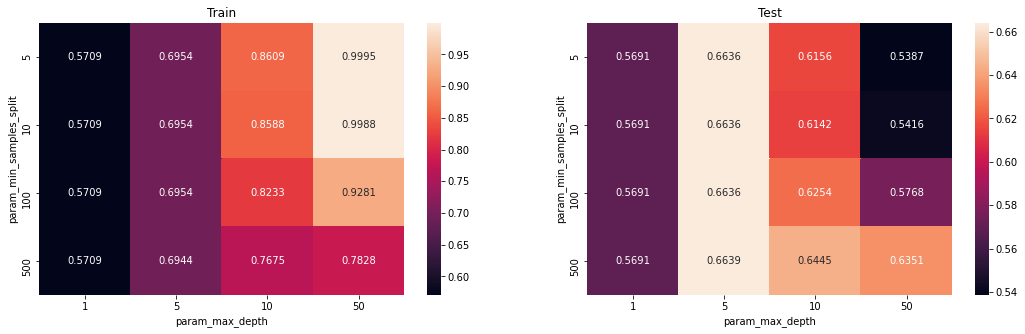

In [98]:
#confusion matrix
# cv_results_ is A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame
scores= pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
#grouping by param_min_samples and param_max_depth and corrresponding to them, max mean score obtained by gridsearch

fig, ax= plt.subplots(1,2, figsize=(18,5)) #18width,5 height of each plot
ax[0].set_title('Train') #title for first plot
ax[1].set_title('Test') #title for second plot

sns.heatmap(scores.mean_train_score,annot=True,fmt='.4g', ax=ax[0])
sns.heatmap(scores.mean_test_score,annot=True,fmt='.4g', ax=ax[1])

plt.show()

In [99]:
clf.best_params_ #best parameters as per gridsearch

{'max_depth': 5, 'min_samples_split': 500}

In [0]:
def pred_proba(clf, data): #function to predict y
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

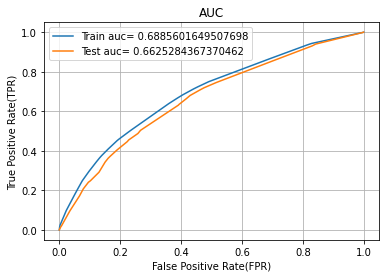

In [101]:
from sklearn.metrics import roc_curve, auc
dectree= DecisionTreeClassifier( class_weight= 'balanced', max_depth= clf.best_params_['max_depth'], min_samples_split= clf.best_params_['min_samples_split'] )
dectree.fit(X_set2_train, Y_train)

Y_train_pred= pred_proba(dectree,X_set2_train)
Y_test_pred= pred_proba(dectree, X_set2_test)

train_fpr, train_tpr, tr_thresholds= roc_curve(Y_train, Y_train_pred)
test_fpr, test_tpr, te_thresholds= roc_curve(Y_test, Y_test_pred)

plt.plot(train_fpr, train_tpr, label= "Train auc= "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label= "Test auc= "+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix:

#### Train:

In [0]:
#finding best threshold which gives minimum fpr:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#predicting with best thresholds:
def predict_with_best_t(proba, threshold):
    predictions = []
    global predictions_tf_w2v
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_tf_w2v=predictions
    return predictions

In [103]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(Y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.40910198723860886 for threshold 0.504
Train confusion matrix
[[ 5173  2932]
 [16309 29117]]


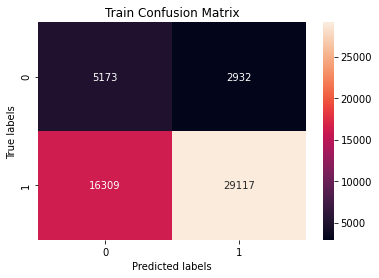

In [104]:
#heatmap
ax=plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict_with_best_t(Y_train_pred, best_t)),ax=ax, annot=True,fmt='g');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

#### Test:

In [105]:
best_t = find_best_threshold(tr_thresholds, test_fpr, test_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(Y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3878075726723214 for threshold 0.483
Train confusion matrix
[[ 2830  2133]
 [ 8897 18915]]


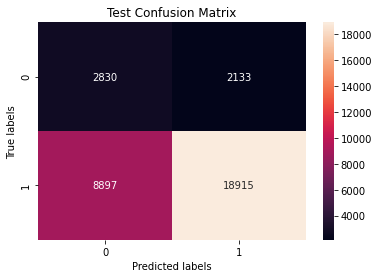

In [106]:
#heatmap
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict_with_best_t(Y_test_pred, best_t)),annot=True,ax=ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

#### Getting the false positives

In [0]:
# finding the index of all the false positives that is 'actual negatives', wrongly classified as 'positives':
fp= []

for i in range(len(Y_test)):
  if (Y_test[i]==0) & (predictions_tf_w2v[i]==1):
    fp.append(i)

In [0]:
# for all those data points which are 'false positive' we extract their essay for word cloud:
fp_essay=[]
for i in fp:
  fp_essay.append(X_test['essay'].values[1])

#### Word Cloud:

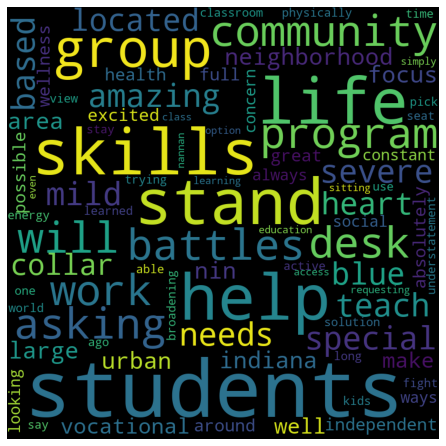

In [109]:
# https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
  val = str(val) # converts all type of values into string
  tokens = val.split() # splits the sentences into individual words
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower() #lowercases the words
  
for words in tokens : #seperates the words by a blank space
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [0]:
cols = X_test.columns
X_test_false_bow = pd.DataFrame(columns=cols)

In [0]:
for i in fp :
  X_test_false_bow = X_test_false_bow.append(X_test.filter(items=[i], axis=0)) #filtering by index of false positives

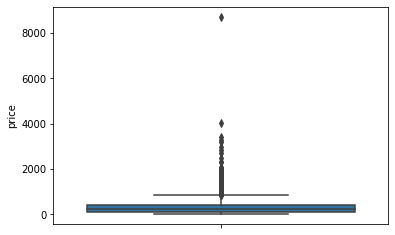

In [112]:
ax = sns.boxplot(y='price', data=X_test_false_bow)

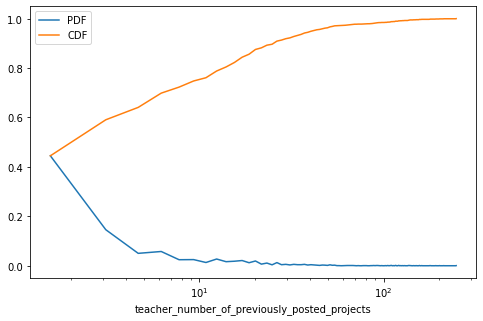

In [113]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_false_bow['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

##Top 5000 features from SET 2:

In [0]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif

best_k = SelectKBest(f_classif, k=5000).fit(X_set1_train, Y_train)
X_set3_train= best_k.transform(X_set1_train)
X_set3_test= best_k.transform(X_set1_test)

## Applying Logistic Regression on 'Top 5000 features' SET-3

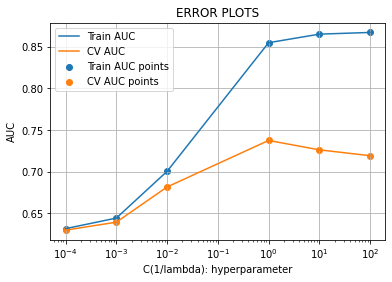

In [115]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, GridSearchCV

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

clf = LogisticRegression(class_weight='balanced');
parameters ={'C':[10**-4, 10**-3,10**-2,1,10,100]}
cl = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc',return_train_score=True)
cl.fit(X_set3_train, Y_train);

train_auc= cl.cv_results_['mean_train_score']
train_auc_std= cl.cv_results_['std_train_score']
cv_auc = cl.cv_results_['mean_test_score'] 
cv_auc_std= cl.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
plt.plot(parameters['C'], cv_auc, label='CV AUC')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [116]:
# finding best C: hyperparameter
C= [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10, 100]
score_t_cv=[x for x in cv_auc]
opt_t_cv=C[score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:"+' '+str(max(score_t_cv)))
print("Corresponding k value of cv is:",opt_t_cv,'\n')
best_C=opt_t_cv
print(best_C)

Maximum AUC score of cv is: 0.7373198231251351
Corresponding k value of cv is: 0.1 

0.1


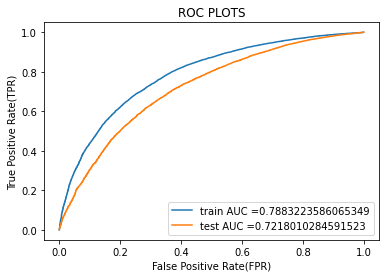

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=best_C,class_weight='balanced');
neigh.fit(X_set3_train ,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(Y_train, neigh.predict_proba(X_set3_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(Y_test, neigh.predict_proba(X_set3_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

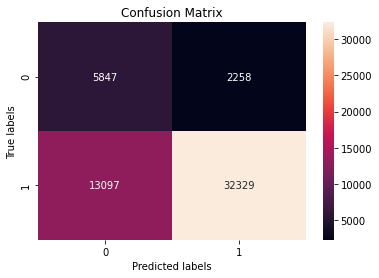

In [118]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, neigh.predict(X_set3_train )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

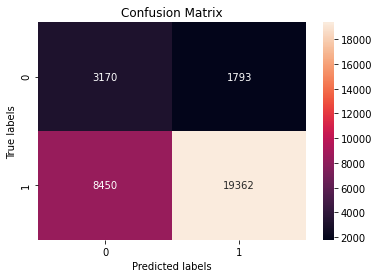

In [119]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, neigh.predict(X_set3_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

# Conclusion

In [11]:
# https://ptable.readthedocs.io/en/latest/tutorial.html
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer","Model","Hyper Parameter","min_samples split","AUC"]

x.add_row(["TFIDF","Decision Tree","10 (max depth)",500,0.68])
x.add_row(["TFIDF W2V","Decision Tree","5 (max depth)",500,0.65])
x.add_row(["TOP 5000 feat","Logistic Regression","0.1 (C)", "Nan",0.72])

x.padding_width =0
print (x)

+-------------+-------------------+---------------+-----------------+----+
|  Vectorizer |       Model       |Hyper Parameter|min_samples split|AUC |
+-------------+-------------------+---------------+-----------------+----+
|    TFIDF    |   Decision Tree   | 10 (max depth)|       500       |0.68|
|  TFIDF W2V  |   Decision Tree   | 5 (max depth) |       500       |0.65|
|TOP 5000 feat|Logistic Regression|    0.1 (C)    |       Nan       |0.72|
+-------------+-------------------+---------------+-----------------+----+
